In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import prettyplotlib as ppl
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern Roman'], 'size':14})
rc('text', usetex=True)

In [2]:
# read in dataframe
df_orig = pd.read_csv('final_data_files/uncrowded_everything_m4.csv')

df = df_orig[(np.isfinite(df_orig.resid_m4_j)) & (np.isfinite(df_orig.resid_m4_h)) &
             (np.isfinite(df_orig.resid_m4_k)) &
             (np.isfinite(df_orig.resid_m4_3)) & (np.isfinite(df_orig.resid_m4_4))]

df1 = df[df.type == 0]
df2 = df[df.type == 1]

# show column names for reference
print df.columns.values

['id' 'type' 'per' 'mag_j' 'merr_j' 'mag_h' 'merr_h' 'mag_k' 'merr_k'
 'mag_3' 'merr_3' 'mag_4' 'merr_4' 'resid_m4_j' 'resid_m4_h' 'resid_m4_k'
 'resid_m4_3' 'resid_m4_4' 'photfeh' 'photfeh_err' 'spectfeh'
 'spectfeh_err']


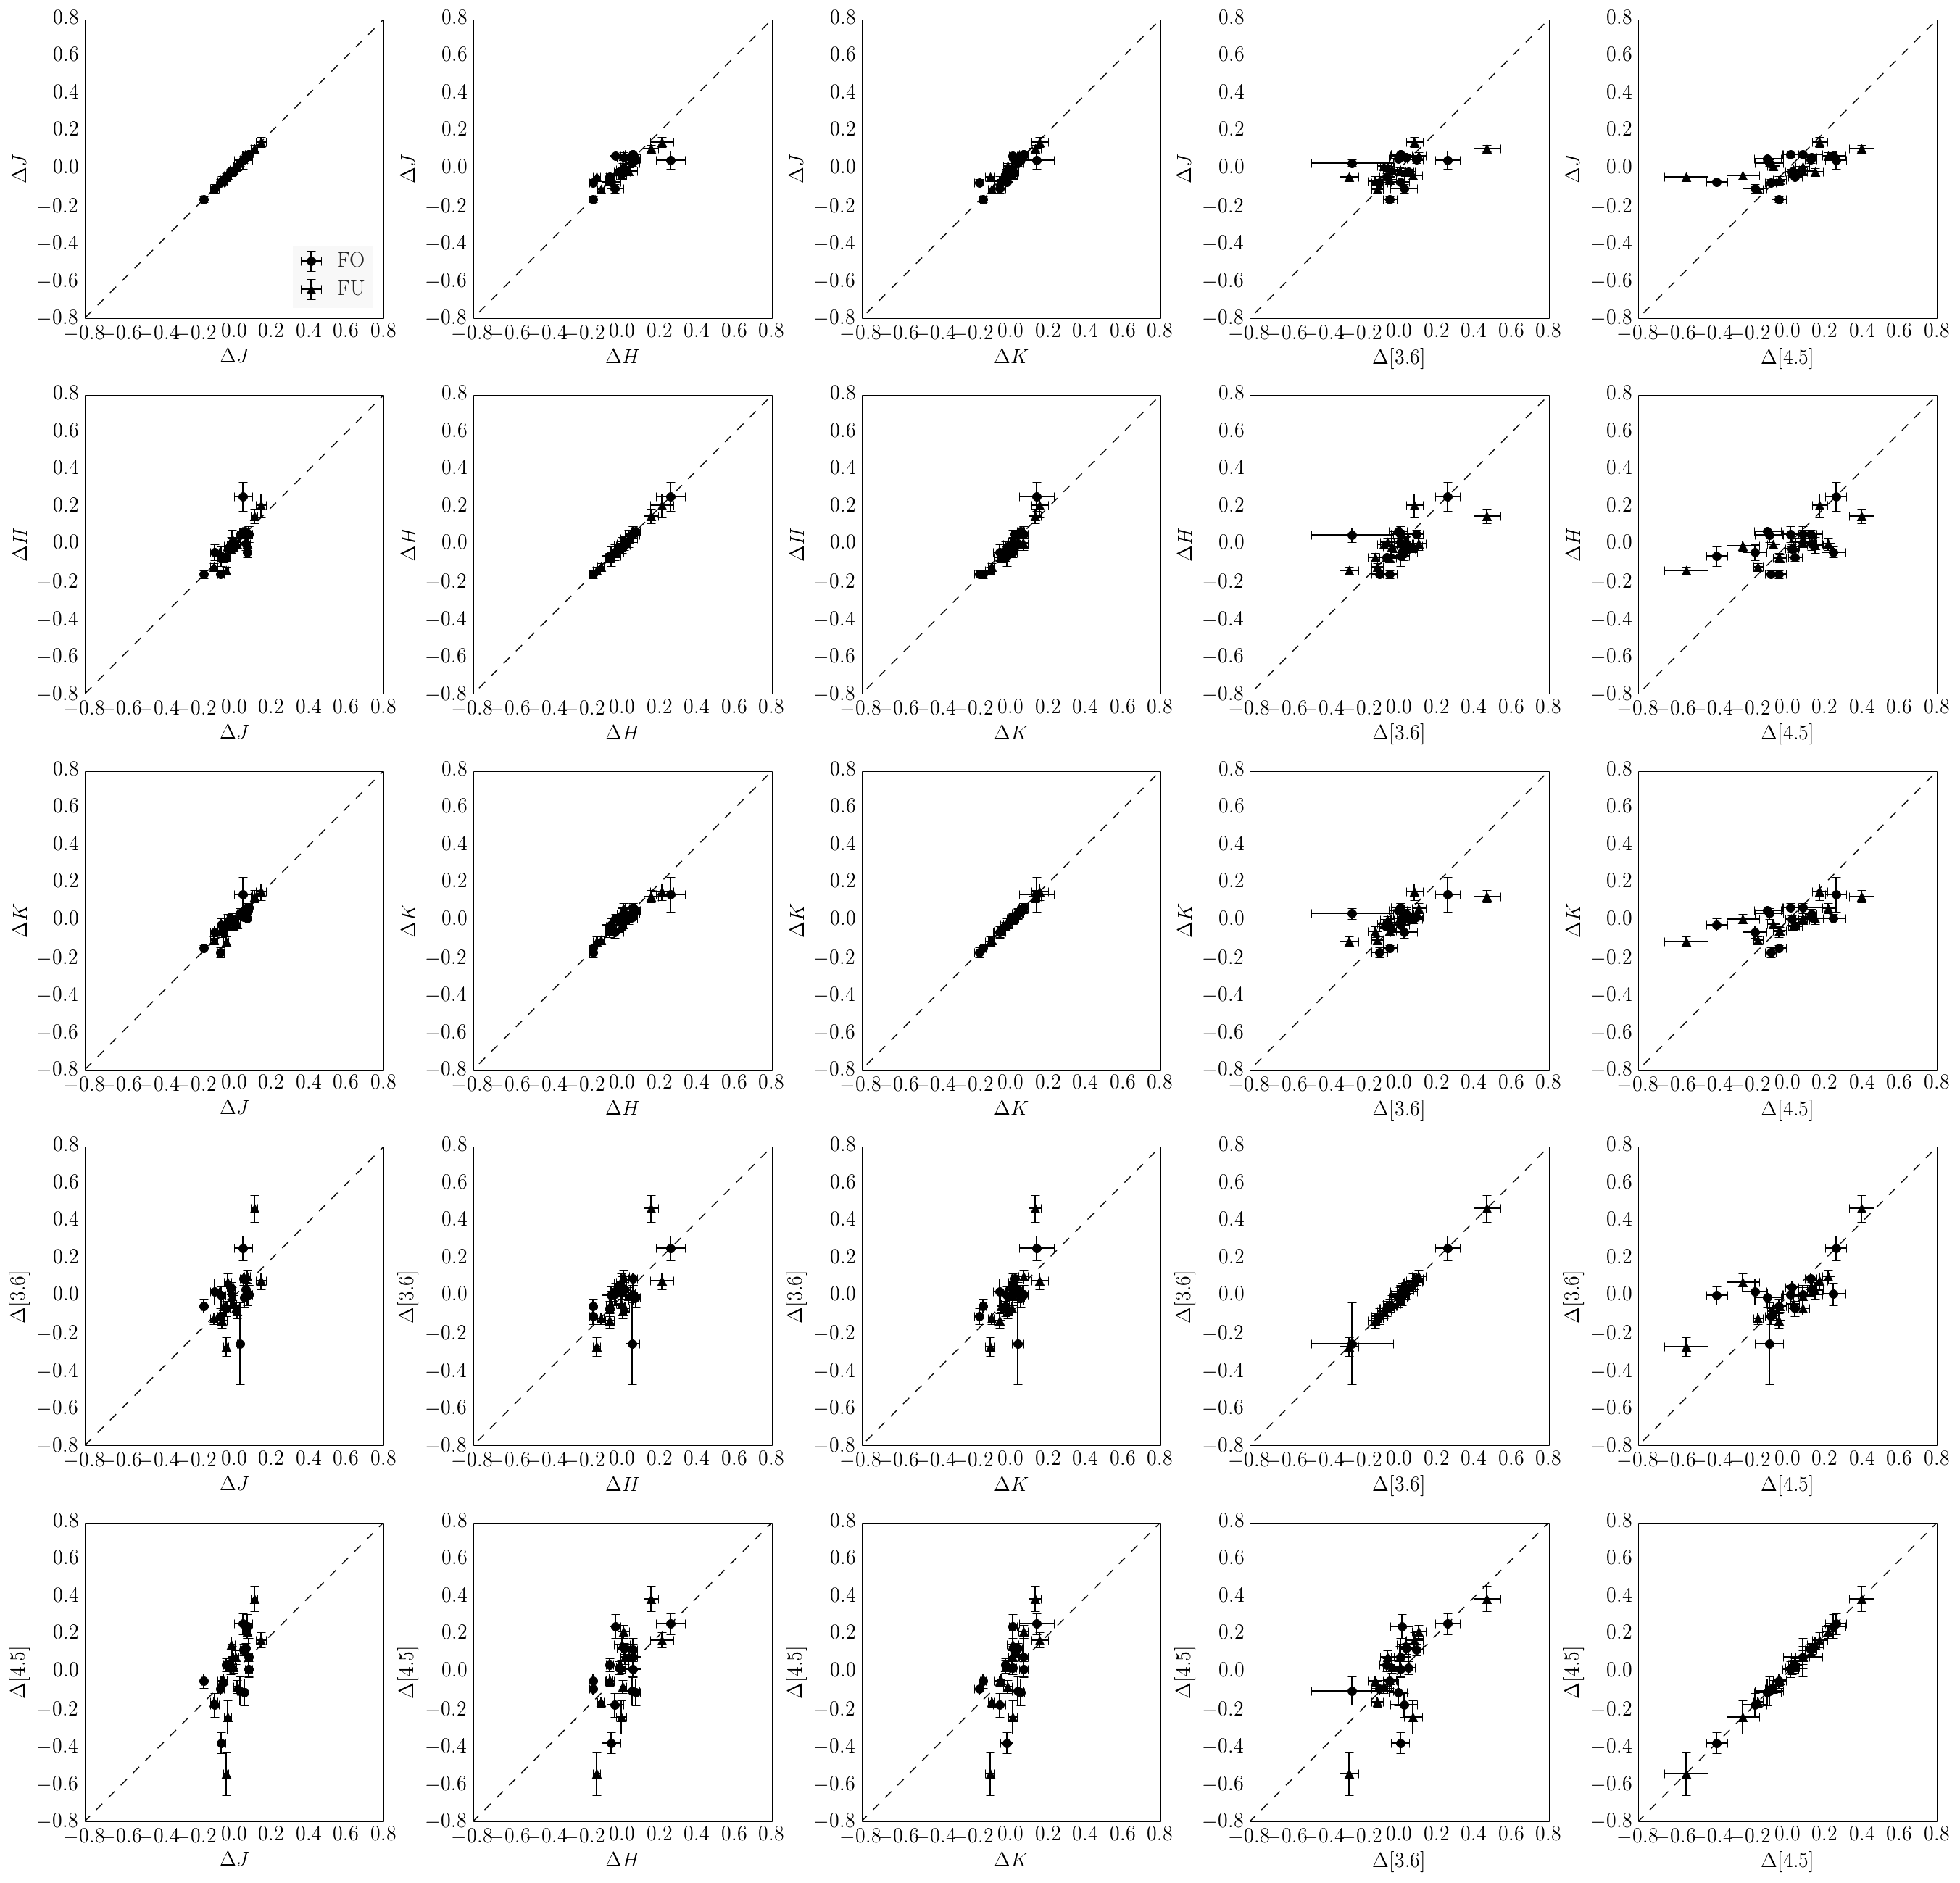

In [4]:
band_list = ['j', 'h', 'k', '3', '4']
band_list2 = ['J', 'H', 'K', '[3.6]', '[4.5]']

fig = plt.figure(figsize=(19,19))

for i in range(5):
    for j in range(5):
        ax = plt.subplot2grid((5,5),(j,i), aspect='equal')
        ppl.plot(ax,(-4,4),(-4,4),'k--')
        ax.errorbar(df1['resid_m4_' + band_list[i]], df1['resid_m4_' + band_list[j]],
                    xerr = df1['merr_' + band_list[i]], yerr = df1['merr_' + band_list[j]],
                    fmt='o', color='k', label='FO')
        ax.errorbar(df2['resid_m4_' + band_list[i]], df2['resid_m4_' + band_list[j]],
                    xerr = df2['merr_' + band_list[i]], yerr = df2['merr_' + band_list[j]],
                    fmt='^', color='k', label='FU')
        #ax.text(-0.75, 0.69, r'$\Delta {}$ vs $\Delta {}$'.format(band_list2[i], band_list2[j]))
        ax.set_xlabel('$\Delta {}$'.format(band_list2[i]))
        ax.set_ylabel('$\Delta {}$'.format(band_list2[j]))        
        if i==0 and j==0:
            ppl.legend(loc=4, prop={'size':14}, numpoints=1, handlelength=1)
        ax.set_xlim(-0.8,0.8)
        ax.set_ylim(-0.8,0.8)
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, hspace=0.)
fig.savefig('final_plots/delta_delta_all.pdf')